# Asteroid families in osculating and proper elements 

Figure 3.9 from Chapter 3 of Ryden, *Celestial and Stellar Dynamics*, Cambridge University Press.

Plot osculating inclination versus osculating eccentricity for the asteroid sample of Figure 3.8 next to
a similar plot for the same sample using proper inclination and proper eccentricity.

In [2]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)
warnings.filterwarnings('ignore',category=RuntimeWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.  

In [3]:
plotFile = 'Fig3_9.png' 

# graphic aspect ratio = width/height

aspect = 2.2

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

figFmt = 'png'
dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 10
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)

# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Asteroid proper orbit elements

Read ASCII data files of proper orbit elements of Main Belt and Hungaria asteroids from the AstDyS-2 database: 
https://newton.spacedys.com/astdys/, file `all.syn`, which we rename `AstDyS-2_all.txt` to 
distinguish it from other files in the `Asteroids/` folder.

We make a brightness cut of all asteroids brighter than H=14.5, which corresponds to a size of roughly 3-5km
for typical values of asteroid geometric albedo (see https://cneos.jpl.nasa.gov/tools/ast_size_est.html at the
JPL Center for Near Earth Studies for a useful table).

In [4]:
dataFile = 'Asteroids/AstDyS-2_all.txt'

data = pd.read_csv(dataFile,sep=r'\s+',header=None,comment='%',low_memory=False)

H = np.array(data[1])
minH = 14.0

iBright = np.where(H <= minH)[0]
print(f'{len(iBright)} asteroids brighter than H={minH:.1f}mag')
a_p = np.array(data[2])[iBright]
e_p = np.array(data[3])[iBright]
i_p = np.degrees(np.arcsin(data[4]))[iBright]

apMin = 2.1 # au
apMax = 3.3 # au
ipMin = 0.0  # deg
ipMax = 18.0 # deg
epMin = 0.0
epMax = 0.30

# outline text to highlight against dark background?

outline = False
famFont = 14

31704 asteroids brighter than H=14.0mag


## Osculating elements

Plot the osculating element $i$ and $e$ for main belt asteroids brighter than 14.3 mag which is a reasonable
proxy for matching the 2 samples.

In [5]:
mpcFile = 'Asteroids/MPC_MainBeltPlus.csv' 

mpcData = pd.read_csv(mpcFile,comment='#')

minH = 14.3

iBright = np.where(mpcData['H'] <= minH)[0]
print(f'{len(iBright)} asteroids brighter than {minH:.1f}mag')

eMB = np.array(mpcData['e'])[iBright]
iMB = np.array(mpcData['i'])[iBright]

34286 asteroids brighter than 14.3mag


## Figure 3.9: side by side format


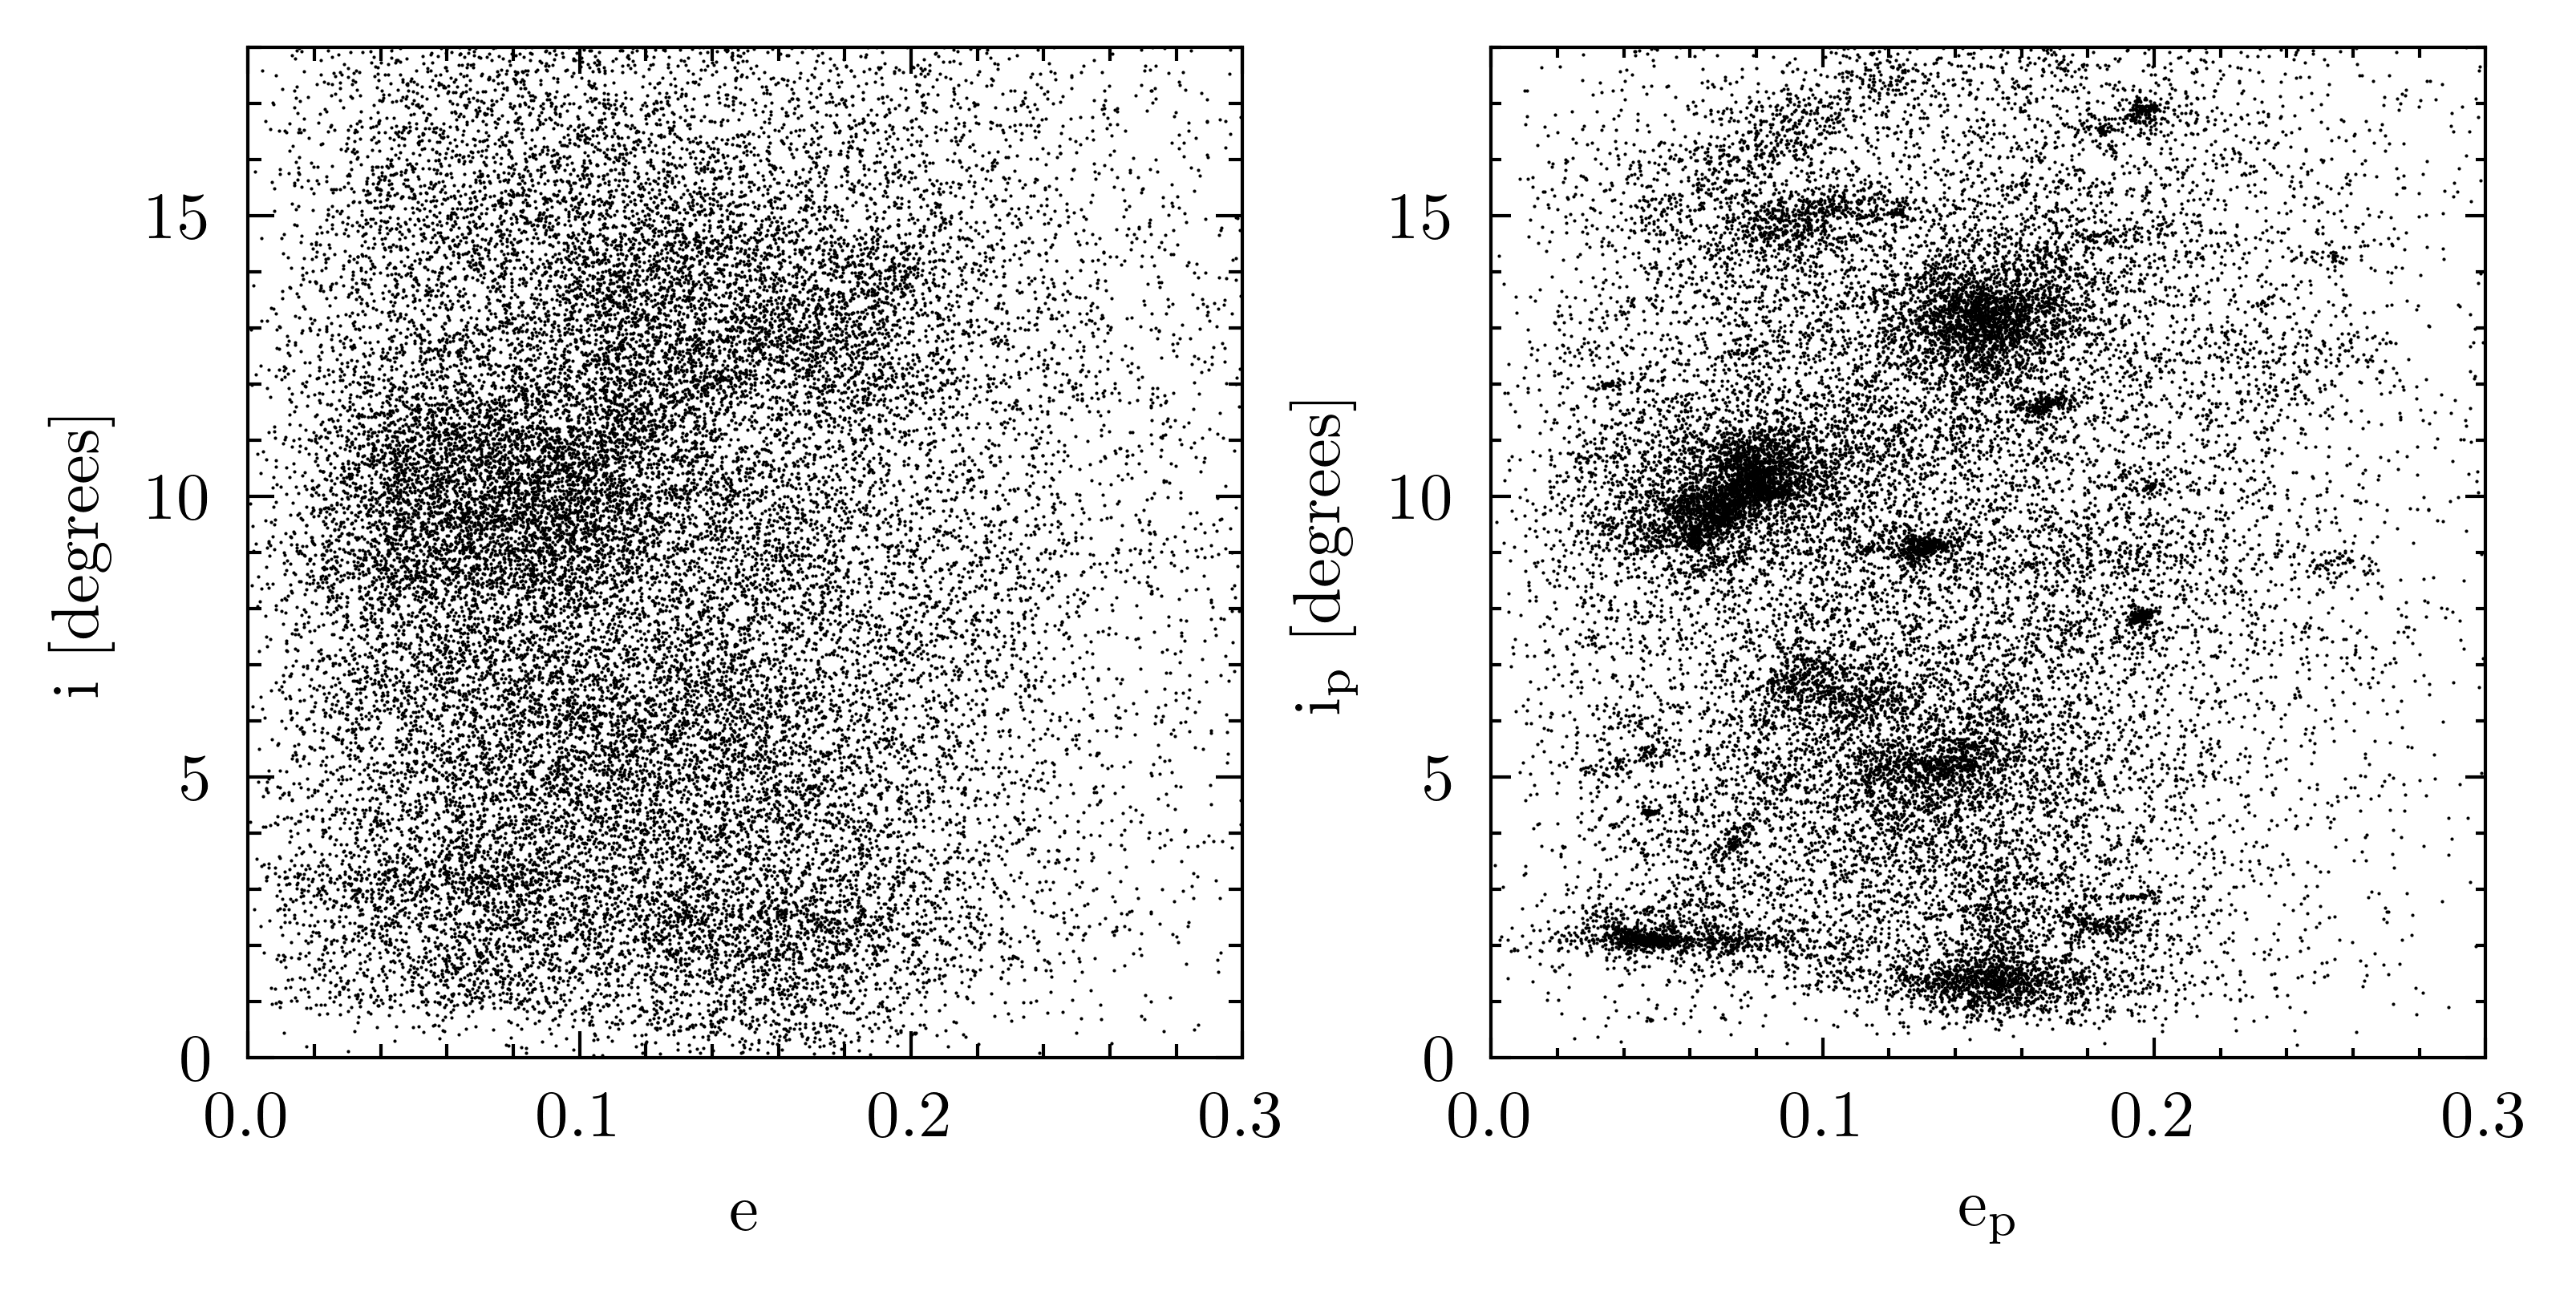

In [6]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(wInches,hInches),dpi=dpi)
fig.subplots_adjust(wspace=0.25, hspace=0.0)

# left panel: osculating elements

ax1.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax1.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')

ax1.set_xlim(epMin,epMax)
ax1.xaxis.set_major_locator(MultipleLocator(0.1))
ax1.xaxis.set_minor_locator(MultipleLocator(0.02))
ax1.set_xlabel(r'e',fontsize=axisFontSize)

ax1.set_ylim(ipMin,ipMax)
ax1.yaxis.set_major_locator(MultipleLocator(5))
ax1.yaxis.set_minor_locator(MultipleLocator(1))
ax1.set_ylabel(r'i [degrees]',fontsize=axisFontSize)

ax1.plot(eMB,iMB,'o',ms=0.5,mfc='black',mec=None,mew=0,alpha=1,zorder=8)

# right panel: proper elements

ax2.tick_params('both',length=3,width=lwidth,which='major',direction='in',top='on',right='on')
ax2.tick_params('both',length=1.5,width=lwidth,which='minor',direction='in',top='on',right='on')

ax2.set_xlim(epMin,epMax)
ax2.xaxis.set_major_locator(MultipleLocator(0.1))
ax2.xaxis.set_minor_locator(MultipleLocator(0.02))
ax2.set_xlabel(r'e$_{\rm p}$',fontsize=axisFontSize)

ax2.set_ylim(ipMin,ipMax)
ax2.yaxis.set_major_locator(MultipleLocator(5))
ax2.yaxis.set_minor_locator(MultipleLocator(1))
ax2.set_ylabel(r'i$_{\rm p}$ [degrees]',fontsize=axisFontSize)

ax2.plot(e_p,i_p,'o',ms=0.5,mfc='black',mec=None,mew=0,alpha=1,zorder=8)

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')